# Part 1. Project Background <a name= '1'></a>

These days, banks spend a lot of money on advertising. This is important because it helps them make their advertising strategies better and more useful. When banks know what customers want, they can make better plans for advertising, create better products, and make customers happier.

### Main Goal: Make the bank's phone marketing better
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.


# Part 2. Data Cleaning <a id="2"></a>

## Load the raw data


**About Dataset**

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

sns.set_palette('Set1')

In [2]:
# Load train data
df= pd.read_csv('Bank_Data.csv')

There are 32950 observations in this dataset. Each represents an existing customer that the bank reached via phone calls.
* For each observation, the dataset records **15 input variables** that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, and the number of contacts.
* There is **a single binary output variable** that denotes “yes” or “no” revealing the outcomes of the phone calls.

In this data set, we have 16 columns(including target column) and almost 32950 rows.
Input variables:
1. age: (numeric)
2.  job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
16. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
# View the first 5 rows in the dataset
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [5]:
# target class count
df["y"].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

###  Plot the distribution of the target column 'y' to check for class imbalance

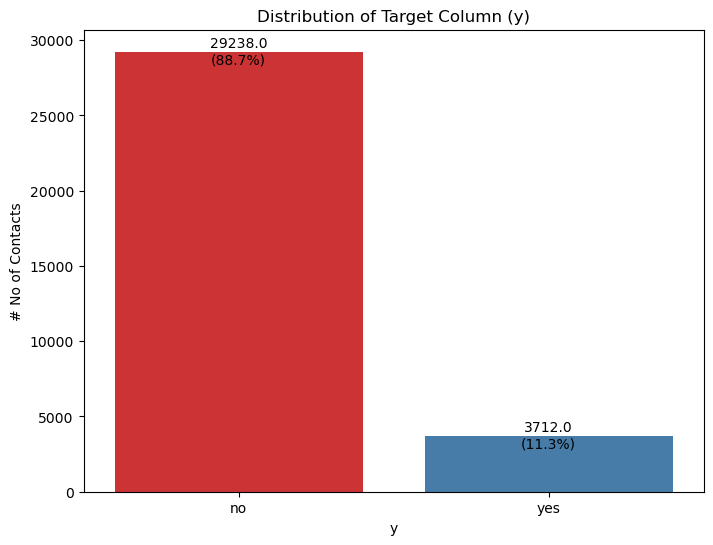

In [6]:
plt.figure(figsize=(8, 6))

# Plot count and percentage with brackets
ax = sns.countplot(x='y', data=df)
total = len(df['y'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

plt.title('Distribution of Target Column (y)')
plt.xlabel('y')
plt.ylabel('# No of Contacts')
plt.show()

The class distribution in the target variable is ~89:11 indicating an imbalance dataset

## Clean the dataset

### 2.1 Deal with missing data

There is no missing value in this dataset. Nevertheless, there are values like “unknown”, which are helpless just like missing values. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

Other method is to smartly replace the value with mode . This doesn't guarantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

In [7]:
# indentifying the categorical variables
df_categorical_columns = df.select_dtypes(include=['object']).columns

# Replace unknown categorical values with mode
for column in df_categorical_columns:
    mode_value = df[column].mode()[0] #The [0] at the end of the line is used to select the first mode in the series, which is then assigned to the mode variable.
    df[column] = df[column].replace('unknown', mode_value)

### 2.2 Dealing with with Duplicate Values

In [8]:
# check duplicates
df.duplicated().sum()

9

In [9]:
# drop dupliacte
df.drop_duplicates(inplace = True)

### 2.3 Filtering

For benchmark purposes, extremely short durations (possibly indicating calls that were not substantial or meaningful) may not contribute significantly to predicting the outcome

In [10]:
# Filter the DataFrame to keep only the rows where the 'duration' is greater than or equal to 5 seconds.
df = df[df['duration'] >= 5]

### 2.4 Creating and transforming data

Some changes were made to the column name, units and data types for easier analysis.

In [11]:
# Change column name: 'y' to 'response'
df = df.rename(columns={'y': 'response'})

In [12]:
#Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'] / 60

In [13]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, float('inf')],
                         labels=[20, 30, 40, 50, 60], right=False)

df['age_group'].value_counts()

age_group
30    13474
40     8423
50     5506
20     4507
60      947
Name: count, dtype: int64

# Part 3. Exploratory Data Analysis <a id="3"></a>

## 3.1 Analysis of Catagorical Variabels

### 3.1.1 Visualize the 'age' with 'response'

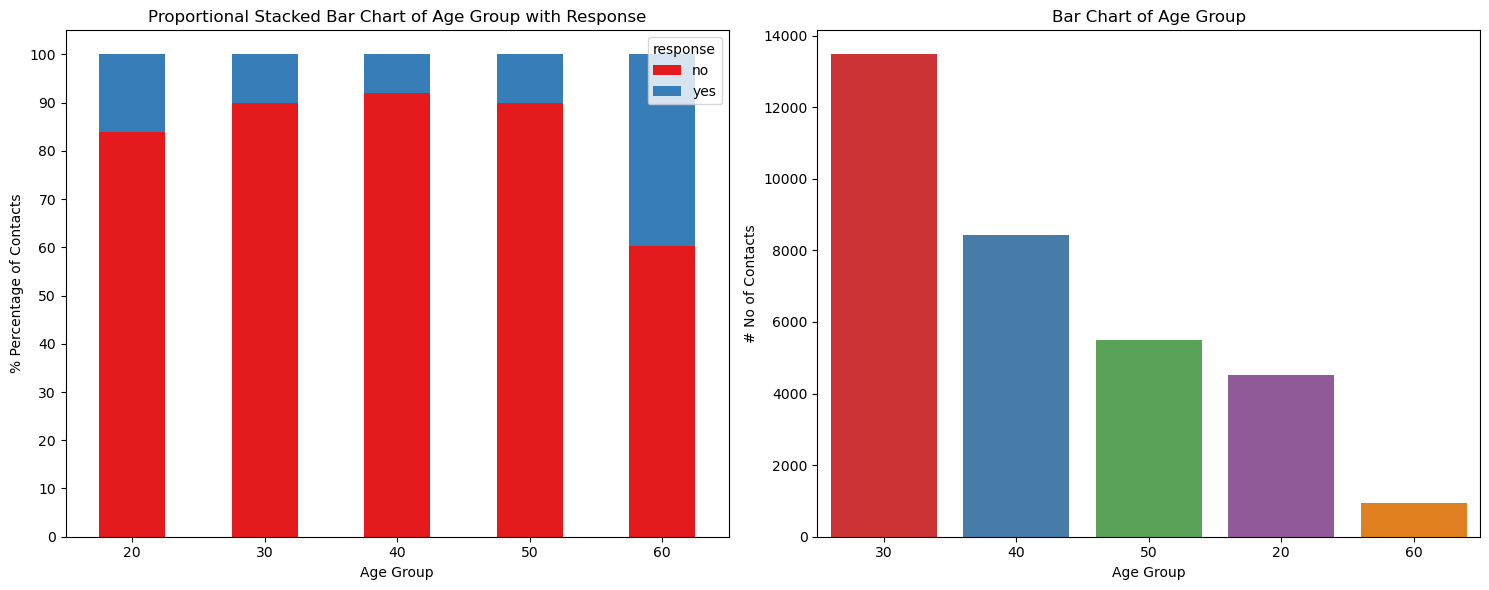

age_group,20,30,40,50,60,Total
response,,,,,,
no,3778,12119,7751,4952,571,29171
yes,729,1355,672,554,376,3686
Total,4507,13474,8423,5506,947,32857


In [14]:
# Calculate the percentage of each response category ('no' and 'yes') for each age group
cross_tab_age_group_percent = pd.crosstab(df['age_group'], df['response']).div(pd.crosstab(df['age_group'], df['response']).sum(axis=1), axis=0) * 100

# Create a subplot with 1 row and 2 columns, specifying the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the proportional stacked bar chart for 'no' and 'yes' responses by age group
cross_tab_age_group_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Age Group with Response')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'age_group'
count_plot_age_group = sns.countplot(x='age_group', data=df, order=df['age_group'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=0)

# Adjust the layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()

# Create a DataFrame with counts for 'age_group' and 'response'
result_df_age_group = df.groupby(['response', 'age_group']).size().unstack(fill_value=0)

# Rename columns to ensure they are treated as strings
result_df_age_group.columns = result_df_age_group.columns.astype(str)

# Add a 'Total' column to the DataFrame
result_df_age_group['Total'] = result_df_age_group.sum(axis=1)

# Add a row with totals for each age group
result_df_age_group.loc['Total'] = result_df_age_group.sum()

# Display the DataFrame as a table
display(result_df_age_group)


**The insights that can be drawn from the chart are:**
1.  The 30 age group has the highest number of contacts made to them, with over 13000 contacts. However, they also have the lowest proportion of yes responses, with only about 10% of them saying yes.
2.  The 60 age group has the lowest number of contacts made to them,not even 1000 contacts. However, they have the highest proportion of yes responses, with about 40% of them saying yes.
3.  The 40 and 50 age groups have similar numbers of contacts made to them, with 8423,5506 contacts. They also have similar proportions of yes responses, with about 10% of them saying yes.
4.  The 20.0 age group has a relatively low number of contacts made to them, with around 4000 contacts. They have a realtively higher proportion of yes responses than the 30,40,50 age group, with about 20% of them saying yes.

* It's not surprising to see that older people usually save money for retirement, while middle-aged folks often want to make more money through investments. The safest choice for older people is term deposits.

* Younger people might not have much money or know about complicated investments like stocks. Term deposits are a good option for them because they're flexible and earn more interest than regular savings accounts.

However, bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

### 3.1.2 Visualize the subscription rate by job

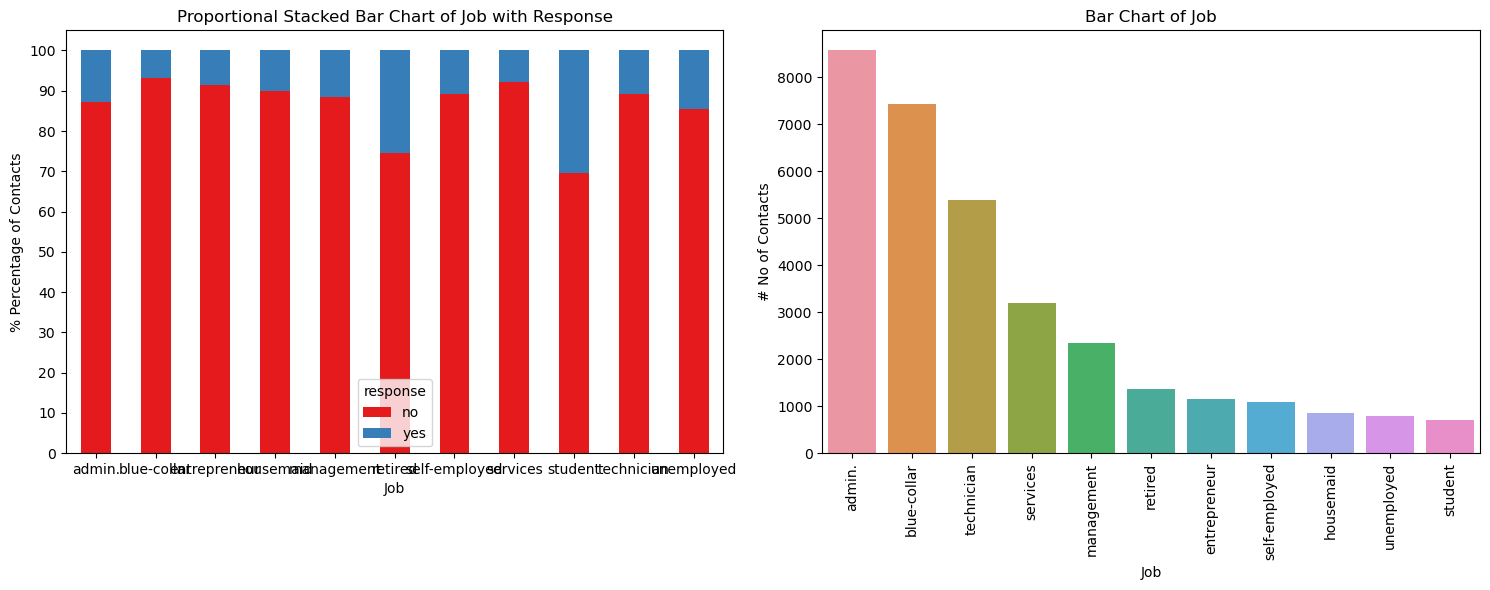

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,Total
response,,,,,,,,,,,,
no,7467,6918,1059,769,2074,1015,979,2940,494,4810,682,29207
yes,1103,515,100,86,269,348,119,254,217,585,116,3712
Total,8570,7433,1159,855,2343,1363,1098,3194,711,5395,798,32919


In [15]:
# Plot the proportional stacked bar chart for 'job'
cross_tab_job_percent = pd.crosstab(df['job'], df['response']).div(pd.crosstab(df['job'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_job_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Job with Response')
axes[0].set_xlabel('Job')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'job'
count_plot_job = sns.countplot(x='job', data=df, order=df['job'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Job')
axes[1].set_xlabel('Job')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'job'
result_df_job = df.groupby(['response', 'job']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_job.columns = result_df_job.columns.astype(str)

# Add a 'Total' column
result_df_job['Total'] = result_df_job.sum(axis=1)

# Add a row with totals
result_df_job.loc['Total'] = result_df_job.sum()

# Display the DataFrame as a table
display(result_df_job)



**The insights that can be drawn from the graph are:**
Admin Job Category:

* The admin job category had the highest number of contacts, with around 7,500, but it had a low proportion of positive responses, with only about 15% saying yes.
Retired and Student Job Categories:

* The retired and student job categories had the lowest number of contacts, with around 500 and 1,000 contacts respectively.
However, they had the highest proportion of positive responses, with about 40% saying yes.
Consistency with Previous Findings:

* The findings align with the previous observation that younger and older individuals tend to have higher subscription rates. In this case, the student category represents a younger group, while the retired category represents an older group.

These insights provide valuable information for refining the bank's marketing strategy, particularly in targeting specific job categories that show higher subscription rates. It's interesting to note the consistency in subscription rates among younger and older individuals across different job categories

### 3.1.3 Visualize the subscription rate by Maritial Status

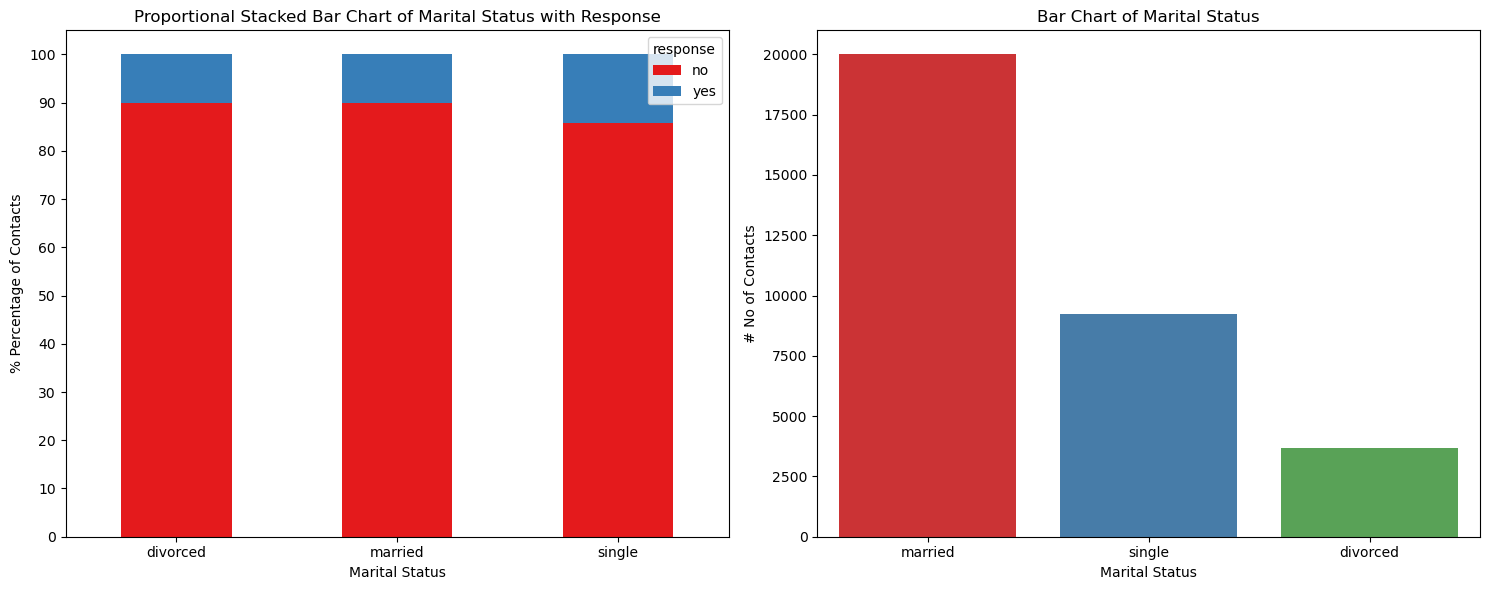

marital,divorced,married,single,Total
response,,,,
no,3302,17966,7939,29207
yes,371,2031,1310,3712
Total,3673,19997,9249,32919


In [16]:
# Plot the proportional stacked bar chart for 'marital'
cross_tab_marital_percent = pd.crosstab(df['marital'], df['response']).div(pd.crosstab(df['marital'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_marital_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Marital Status with Response')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'marital'
count_plot_marital = sns.countplot(x='marital', data=df, order=df['marital'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'marital'
result_df_marital = df.groupby(['response', 'marital']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_marital.columns = result_df_marital.columns.astype(str)

# Add a 'Total' column
result_df_marital['Total'] = result_df_marital.sum(axis=1)

# Add a row with totals
result_df_marital.loc['Total'] = result_df_marital.sum()

# Display the DataFrame as a table
display(result_df_marital)



**The insights that can be drawn from the graph are:**
* The married category had the highest number of contacts made to them, with around 18000 contacts. However, they also had the lowest proportion of positive responses, with only about 10% of them saying yes.
* The single category had the second highest number of contacts made to them, with around 8000 contacts. They also had the highest proportion of positive responses, with about 15% of them saying yes.
* The divorced category had the lowest number of contacts made to them, with around 3600 contacts. They also had same proportion of positive responses, with about 10% of them saying yes.

### 3.1.4 Visualize the subscription rate by Education

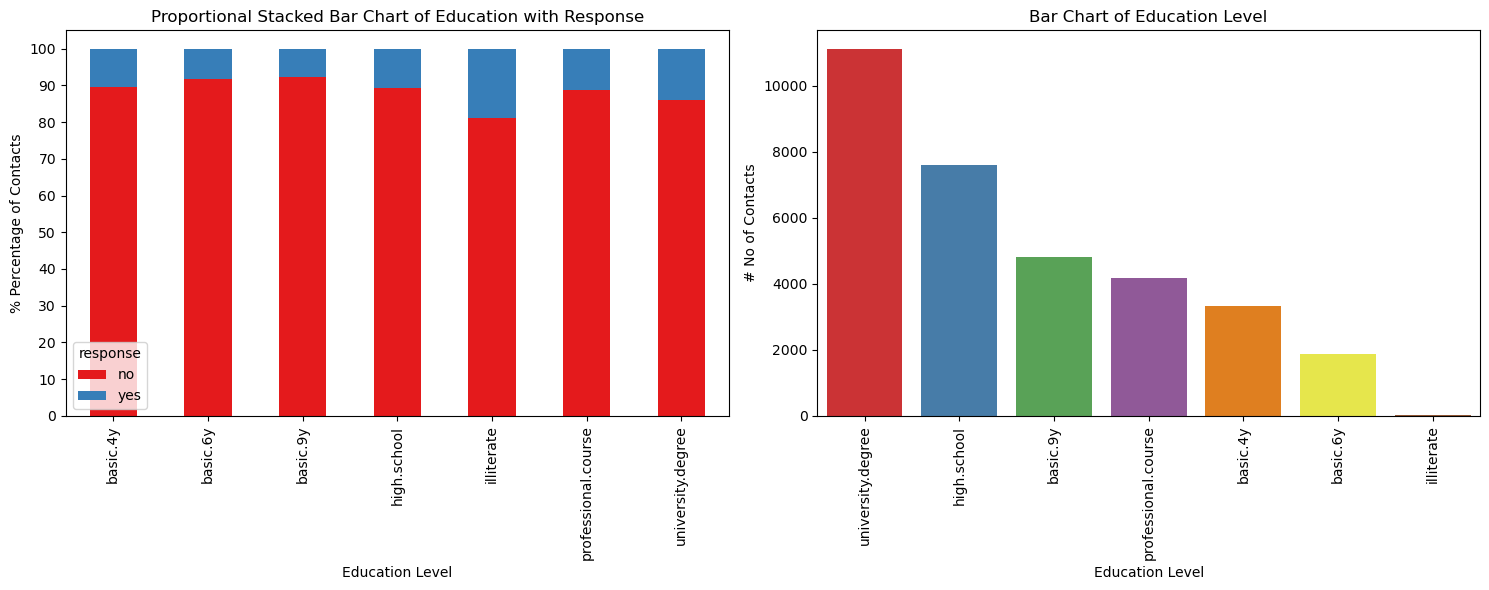

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,Total
response,,,,,,,,
no,2978,1708,4450,6773,13,3715,9570,29207
yes,344,156,369,815,3,473,1552,3712
Total,3322,1864,4819,7588,16,4188,11122,32919


In [17]:
# Plot the proportional stacked bar chart for 'education'
cross_tab_education_percent = pd.crosstab(df['education'], df['response']).div(pd.crosstab(df['education'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_education_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Education with Response')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))
axes[0].tick_params(axis='x', rotation=90)

# Plot the count bar chart for 'education'
count_plot_education = sns.countplot(x='education', data=df, order=df['education'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'education'
result_df_education = df.groupby(['response', 'education']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_education.columns = result_df_education.columns.astype(str)

# Add a 'Total' column
result_df_education['Total'] = result_df_education.sum(axis=1)

# Add a row with totals
result_df_education.loc['Total'] = result_df_education.sum()

# Display the DataFrame as a table
display(result_df_education)


**The insights that can be drawn from the graph are:**

University degree holders, despite having the highest number of contacts, also exhibit the highest proportion of positive responses. This suggests that individuals with university degrees may be more inclined to subscribe to term deposits.

### 3.1.5 Visualize the subscription rate by Credit in Default

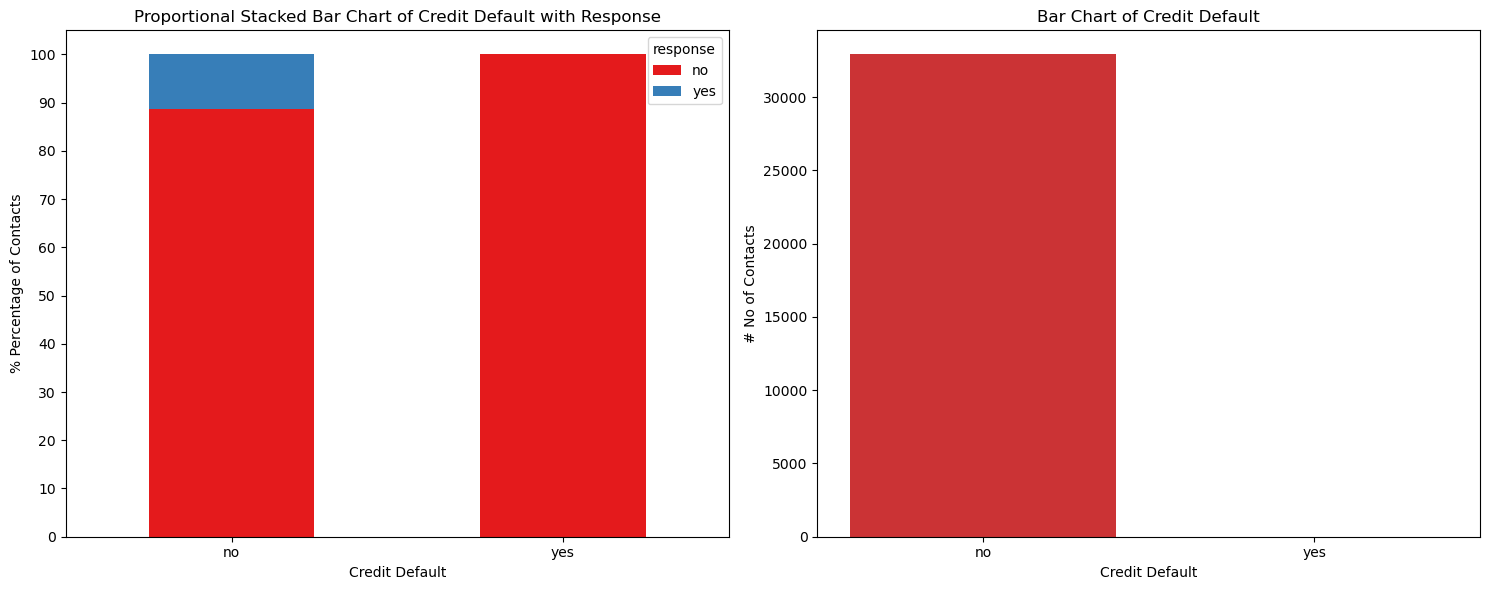

default,no,yes,Total
response,,,
no,29204,3,29207
yes,3712,0,3712
Total,32916,3,32919


In [18]:
# Plot the proportional stacked bar chart for 'default'
cross_tab_default_percent = pd.crosstab(df['default'], df['response']).div(pd.crosstab(df['default'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_default_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Credit Default with Response')
axes[0].set_xlabel('Credit Default')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'default'
count_plot_default = sns.countplot(x='default', data=df, order=df['default'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Credit Default')
axes[1].set_xlabel('Credit Default')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'default'
result_df_default = df.groupby(['response', 'default']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_default.columns = result_df_default.columns.astype(str)

# Add a 'Total' column
result_df_default['Total'] = result_df_default.sum(axis=1)

# Add a row with totals
result_df_default.loc['Total'] = result_df_default.sum()

# Display the DataFrame as a table
display(result_df_default)


**The insights that can be drawn from the graph are:**

Clients who do not have credit in default are more likely to respond positively to term deposit offers.

### 3.1.6 Visualize the subscription rate by Loan

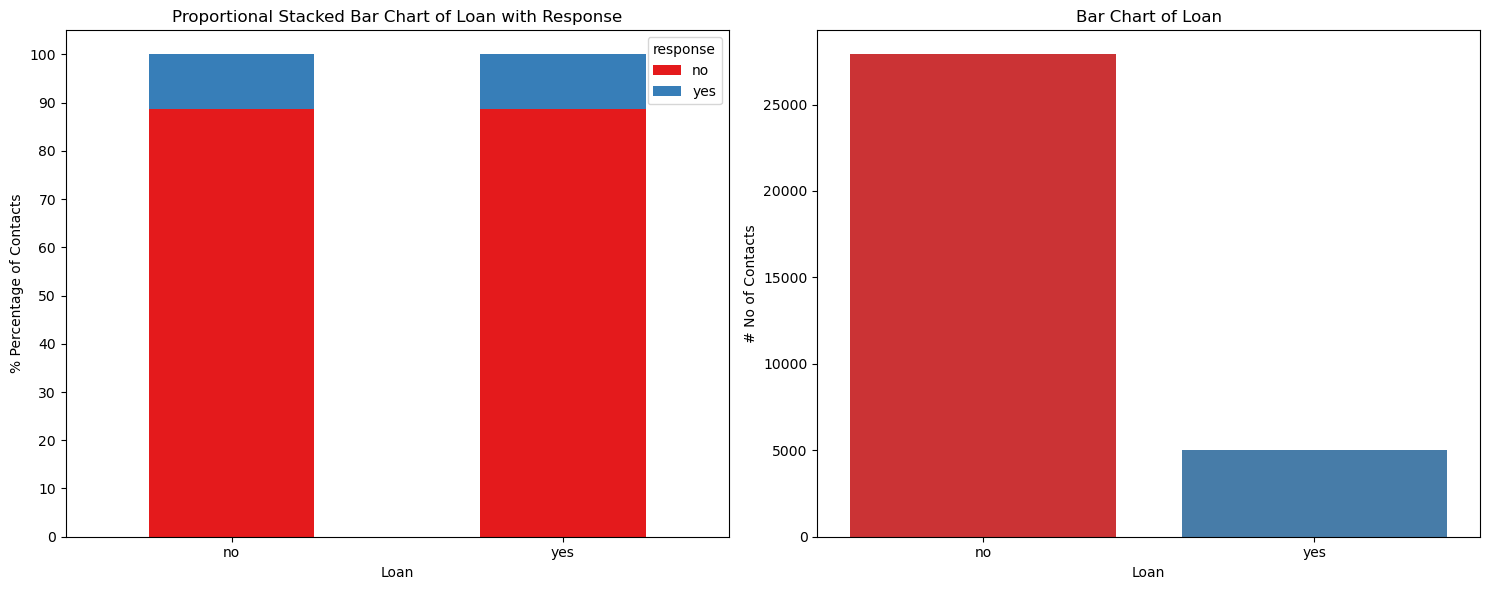

loan,no,yes,Total
response,,,
no,24750,4457,29207
yes,3148,564,3712
Total,27898,5021,32919


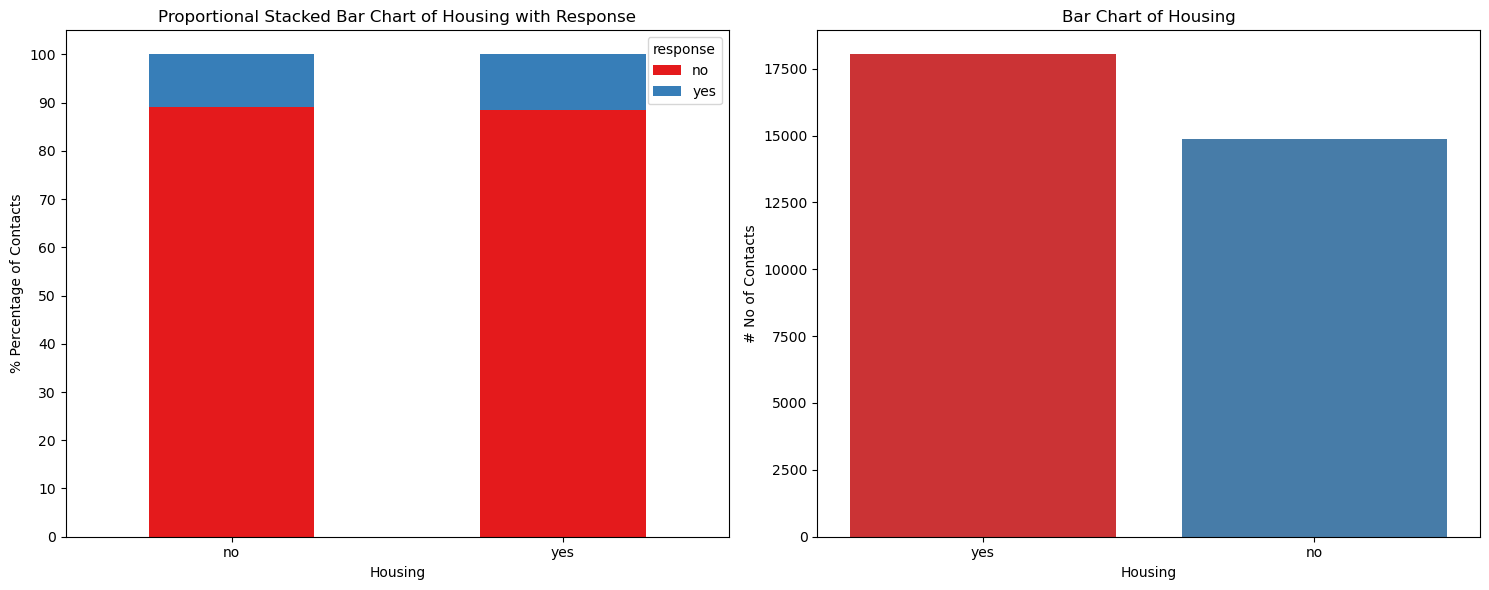

housing,no,yes,Total
response,,,
no,13260,15947,29207
yes,1628,2084,3712
Total,14888,18031,32919


In [19]:
loan_columns = ['loan', 'housing']

for column in loan_columns:
    # Plot the proportional stacked bar chart
    cross_tab_loan_percent = pd.crosstab(df[column], df['response']).div(pd.crosstab(df[column], df['response']).sum(axis=1), axis=0) * 100
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    cross_tab_loan_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
    axes[0].set_title(f'Proportional Stacked Bar Chart of {column.capitalize()} with Response')
    axes[0].set_xlabel(f'{column.capitalize()}')
    axes[0].set_ylabel('% Percentage of Contacts')
    axes[0].set_yticks(range(0, 101, 10))

    # Plot the count bar chart
    count_plot_loan = sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax=axes[1])
    axes[1].set_title(f'Bar Chart of {column.capitalize()}')
    axes[1].set_xlabel(f'{column.capitalize()}')
    axes[1].set_ylabel('# No of Contacts')
    axes[1].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

    # Create a DataFrame with counts for the loan type
    result_df_loan = df.groupby(['response', column]).size().unstack(fill_value=0)

    # Rename columns for clarity
    result_df_loan.columns = result_df_loan.columns.astype(str)

    # Add a 'Total' column
    result_df_loan['Total'] = result_df_loan.sum(axis=1)

    # Add a row with totals
    result_df_loan.loc['Total'] = result_df_loan.sum()

    # Display the DataFrame as a table
    display(result_df_loan)

**The insights that can be drawn from the graph are:**

* Loans, both housing and personal, do not appear to be strong determinants of the subscription response. The response rates seem comparable between those with and without loans.

### 3.1.7 Visualize the subscription rate by Mode of Contact

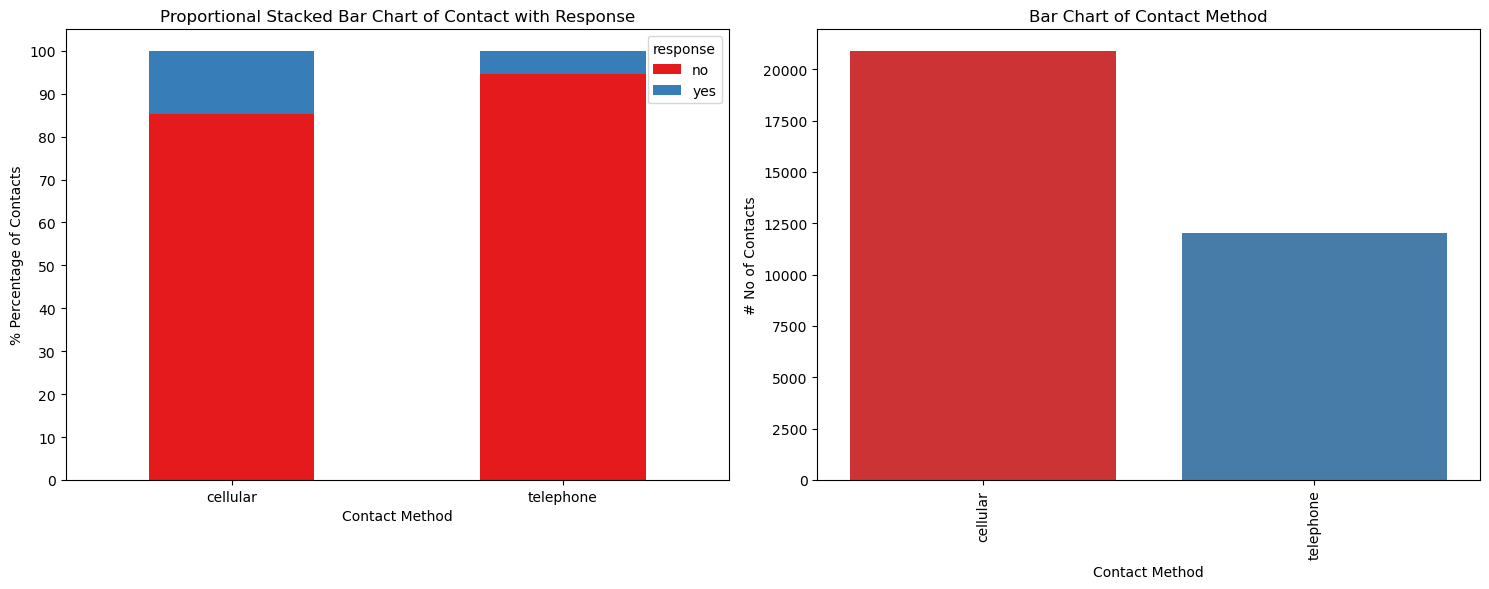

contact,cellular,telephone,Total
response,,,
no,17822,11385,29207
yes,3074,638,3712
Total,20896,12023,32919


In [20]:
# Plot the proportional stacked bar chart for 'contact'
cross_tab_contact_percent = pd.crosstab(df['contact'], df['response']).div(pd.crosstab(df['contact'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_contact_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Contact with Response')
axes[0].set_xlabel('Contact Method')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'contact'
count_plot_contact = sns.countplot(x='contact', data=df, order=df['contact'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Contact Method')
axes[1].set_xlabel('Contact Method')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'contact'
result_df_contact = df.groupby(['response', 'contact']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_contact.columns = result_df_contact.columns.astype(str)

# Add a 'Total' column
result_df_contact['Total'] = result_df_contact.sum(axis=1)

# Add a row with totals
result_df_contact.loc['Total'] = result_df_contact.sum()

# Display the DataFrame as a table
display(result_df_contact)


**The insights that can be drawn from the graph are:**

* The bank's telemarketing efforts through cellular contact appear to be more successful in terms of generating positive responses.

### 3.1.8 Visualize the subscription rate by Month

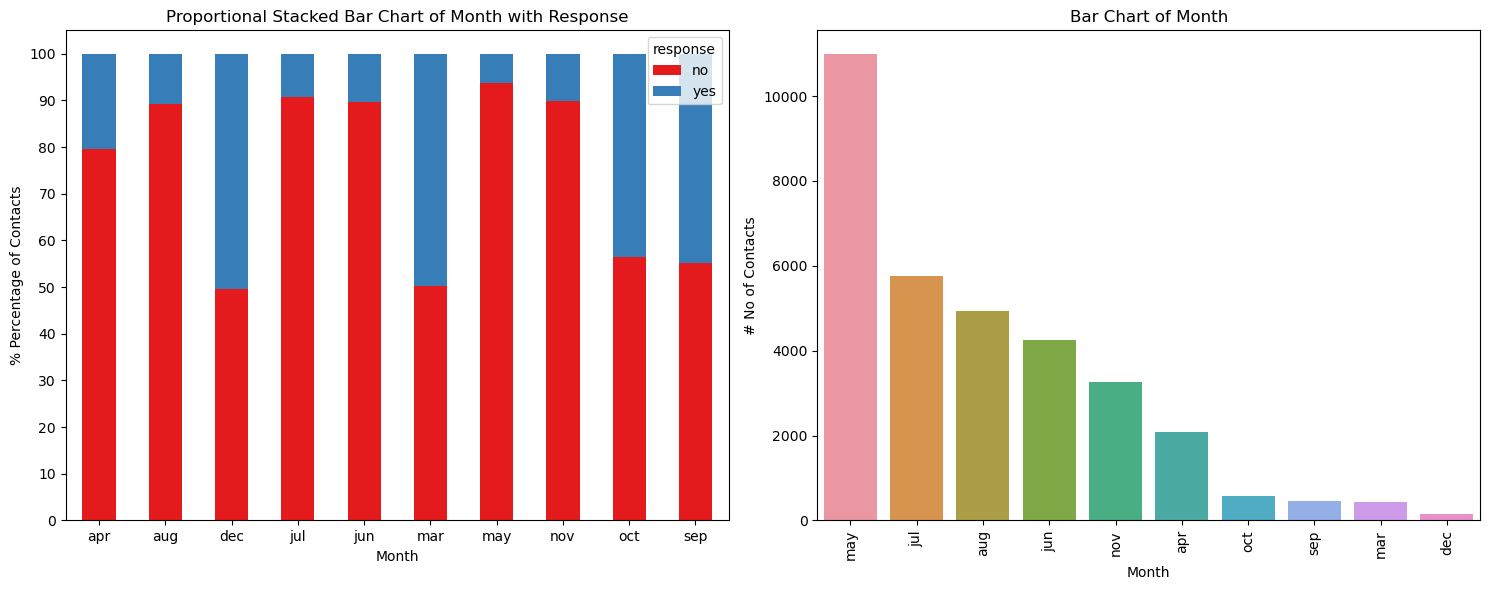

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,Total
response,,,,,,,,,,,
no,1656,4411,71,5228,3805,219,10302,2932,329,254,29207
yes,427,531,72,532,441,217,699,332,254,207,3712
Total,2083,4942,143,5760,4246,436,11001,3264,583,461,32919


In [21]:

# Plot the proportional stacked bar chart for 'month'
cross_tab_month_percent = pd.crosstab(df['month'], df['response']).div(pd.crosstab(df['month'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_month_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Month with Response')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'month'
count_plot_month = sns.countplot(x='month', data=df, order=df['month'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'month'
result_df_month = df.groupby(['response', 'month']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_month.columns = result_df_month.columns.astype(str)

# Add a 'Total' column
result_df_month['Total'] = result_df_month.sum(axis=1)

# Add a row with totals
result_df_month.loc['Total'] = result_df_month.sum()

# Display the DataFrame as a table
display(result_df_month)


**Insights: Start the telemarketing campaign in fall or spring**


Apart from customer details, outside factors like seasons and calling times might affect how many people sign up. This stacked bar chart shows the bank's contact rate and clients' response rate for each month, helping us understand if there's a connection between them.

* The bank made the most contacts from May to August, peaking at around in May. However, the contact rate dropped significantly in March, September, October, and December.

* Surprisingly, the highest subscription rate was in March, and all subscription rates in September, October, and December were over 40%.

Clearly, the bank's contacts and subscription rates are not moving in the same direction, suggesting that the timing of the bank’s marketing campaign might be off. To make the campaign better, the bank should think about starting the telemarketing effort in fall and spring when the subscription rate tends to be higher.

However, the bank needs to be careful when looking at external factors. More data from previous marketing campaigns should be collected and analyzed to be sure that this seasonal effect is consistent over time and will work in the future.

### 3.1.9 Visualize the subscription rate by Day of Week

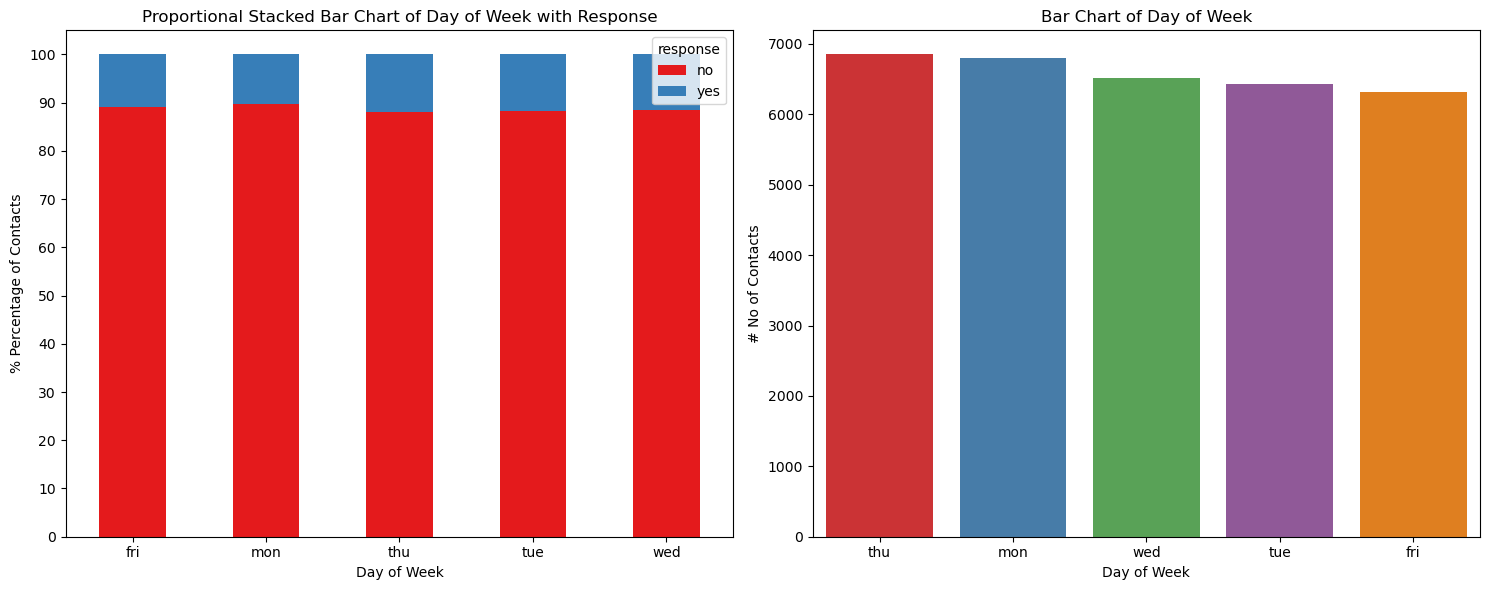

day_of_week,fri,mon,thu,tue,wed,Total
response,,,,,,
no,5626,6108,6027,5685,5761,29207
yes,690,698,823,748,753,3712
Total,6316,6806,6850,6433,6514,32919


In [22]:

# Plot the proportional stacked bar chart for 'day_of_week'
cross_tab_day_of_week_percent = pd.crosstab(df['day_of_week'], df['response']).div(pd.crosstab(df['day_of_week'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_day_of_week_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Day of Week with Response')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'day_of_week'
count_plot_day_of_week = sns.countplot(x='day_of_week', data=df, order=df['day_of_week'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'day_of_week'
result_df_day_of_week = df.groupby(['response', 'day_of_week']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_day_of_week.columns = result_df_day_of_week.columns.astype(str)

# Add a 'Total' column
result_df_day_of_week['Total'] = result_df_day_of_week.sum(axis=1)

# Add a row with totals
result_df_day_of_week.loc['Total'] = result_df_day_of_week.sum()

# Display the DataFrame as a table
display(result_df_day_of_week)


**The insights that can be drawn from the graph areg**

The response rates seem consistent across the days of the week, suggesting that the day of the week may not be a strong determinant of the subscription response.

### 3.1.10 Visualize the subscription rate by Previous marketing campaign

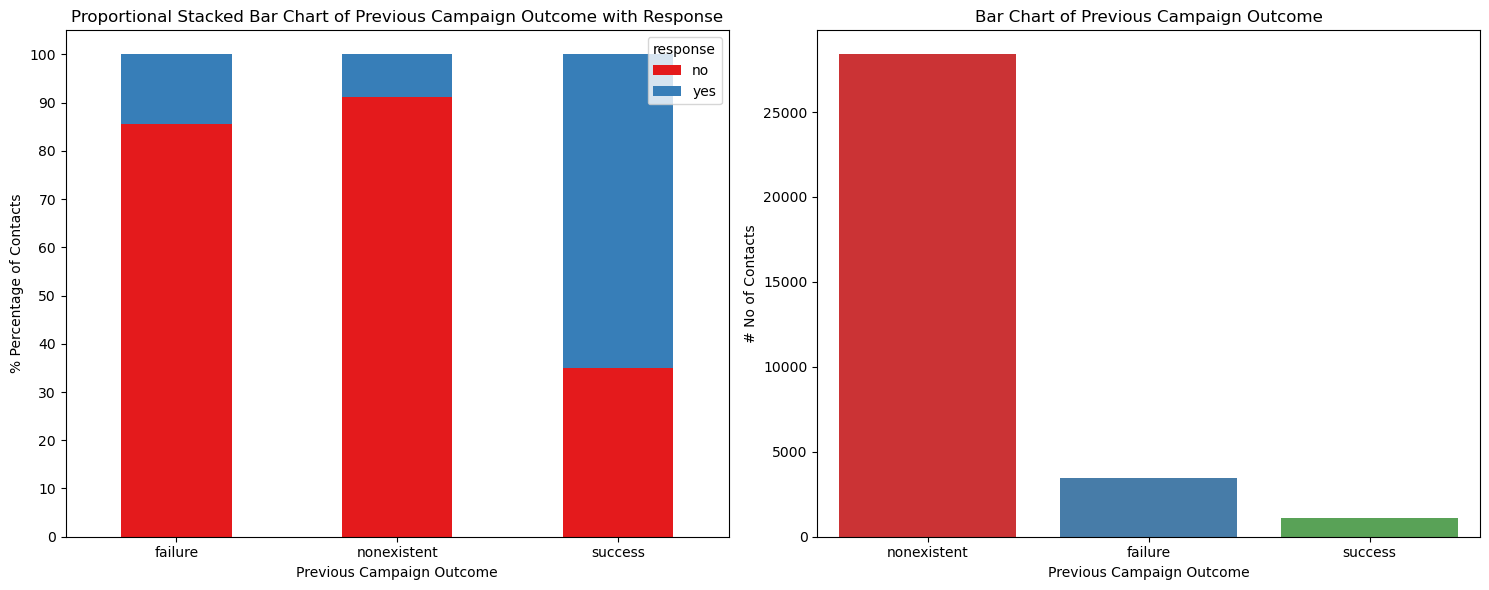

poutcome,failure,nonexistent,success,Total
response,,,,
no,2934,25887,386,29207
yes,494,2501,717,3712
Total,3428,28388,1103,32919


In [23]:
# Plot the proportional stacked bar chart for 'poutcome'
cross_tab_poutcome_percent = pd.crosstab(df['poutcome'], df['response']).div(pd.crosstab(df['poutcome'], df['response']).sum(axis=1), axis=0) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
cross_tab_poutcome_percent[['no', 'yes']].plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_title('Proportional Stacked Bar Chart of Previous Campaign Outcome with Response')
axes[0].set_xlabel('Previous Campaign Outcome')
axes[0].set_ylabel('% Percentage of Contacts')
axes[0].set_yticks(range(0, 101, 10))

# Plot the count bar chart for 'poutcome'
count_plot_poutcome = sns.countplot(x='poutcome', data=df, order=df['poutcome'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Previous Campaign Outcome')
axes[1].set_xlabel('Previous Campaign Outcome')
axes[1].set_ylabel('# No of Contacts')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Create a DataFrame with counts for 'poutcome'
result_df_poutcome = df.groupby(['response', 'poutcome']).size().unstack(fill_value=0)

# Rename columns for clarity
result_df_poutcome.columns = result_df_poutcome.columns.astype(str)

# Add a 'Total' column
result_df_poutcome['Total'] = result_df_poutcome.sum(axis=1)

# Add a row with totals
result_df_poutcome.loc['Total'] = result_df_poutcome.sum()

# Display the DataFrame as a table
display(result_df_poutcome)


**The insights that can be drawn from the graph are:**
* The majority of contacts had a previous outcome of nonexistent, with around 26000 contacts in this category. However, they also had the lowest proportion of positive responses, with only about 10% of them saying yes.
* The fewest contacts had a previous outcome of success, with around 1000 contacts in this category. However, they had the highest proportion of positive responses.
* The intermediate number of contacts had a previous outcome of failure, with around 4000 contacts in this category. They also had an intermediate proportion of positive responses, with about 20% of them saying yes.

## 3.2 Analysis Of Numerical Variabels

### 3.2.1 Visualize the subscription rate by Campaign

In [24]:
df['campaign'].describe()

count    32919.000000
mean         2.560649
std          2.751338
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

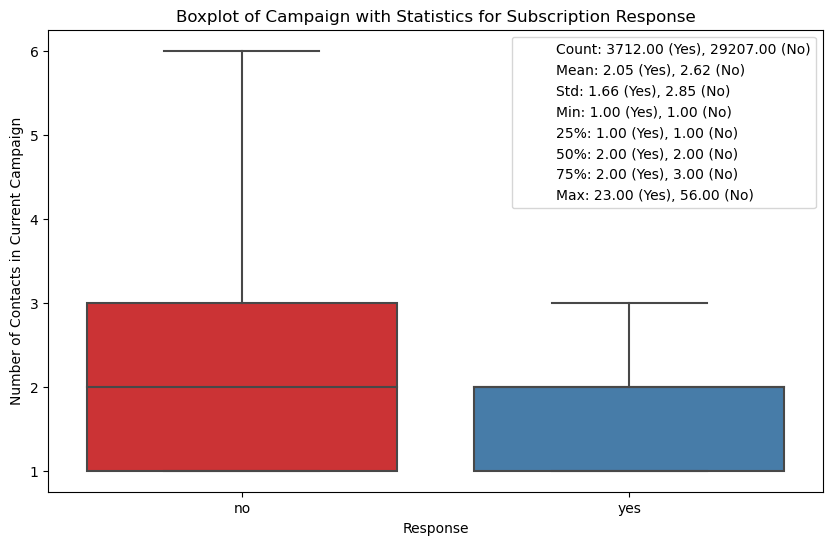

In [25]:
# Define the statistics to be displayed in the legend
stats_to_display = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Create a boxplot with the specified statistics in the legend
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='response', y='campaign', data=df, showfliers=False)  # Set showfliers=False to exclude outliers

# Calculate the desired statistics for the 'campaign' variable based on the 'response'
campaign_stats = df.groupby('response')['campaign'].describe().loc[:, stats_to_display]

# Display the statistics in the legend
for stat in stats_to_display:
    # Create a legend label for each statistic, showing values for both 'yes' and 'no' responses
    legend_label = f"{stat.capitalize()}: {campaign_stats.loc['yes', stat]:.2f} (Yes), {campaign_stats.loc['no', stat]:.2f} (No)"
    ax.plot([], [], label=legend_label, color='white')  # Add empty plots for legend labels

# Set plot labels and title
plt.title('Boxplot of Campaign with Statistics for Subscription Response')
plt.xlabel('Response')
plt.ylabel('Number of Contacts in Current Campaign')

# Show legend
plt.legend()

# Show the plot
plt.show()


**The insights that can be drawn from the graph are:**
* The median duration for contacts who responded with 'yes' was higher than for contacts who responded with 'no'. This means that the contacts who said yes tended to have longer conversations than the contacts who said no.
* The range of duration for contacts who responded with 'yes' was larger than for contacts who responded with 'no'. This means that the contacts who said yes had more variation in their conversation length than the contacts who said no.
* The outliers in the graph indicate that there were some contacts who had very long or very short conversations, regardless of their response. These outliers may have some special characteristics or circumstances that affected their duration.

### 3.2.2 Visualize the subscription rate by Duration

In [26]:
df['duration'].describe()

count    32919.000000
mean         4.305607
std          4.316652
min          0.083333
25%          1.716667
50%          3.000000
75%          5.333333
max         81.966667
Name: duration, dtype: float64

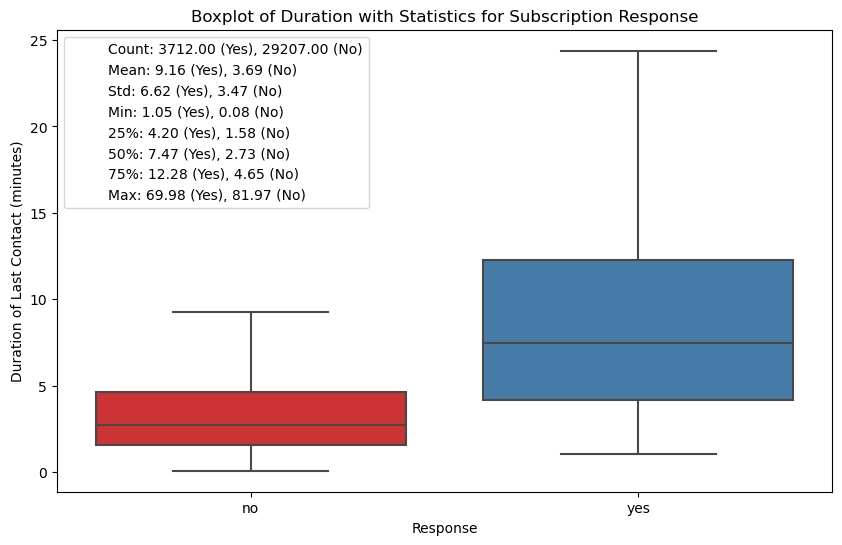

In [27]:

# Define the statistics to be displayed in the legend
stats_to_display = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Create a boxplot with the specified statistics in the legend
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='response', y='duration', data=df, showfliers=False)  # Set showfliers=False to exclude outliers

# Calculate the desired statistics
duration_stats = df.groupby('response')['duration'].describe().loc[:, stats_to_display]

# Display the statistics in the legend
for stat in stats_to_display:
    legend_label = f"{stat.capitalize()}: {duration_stats.loc['yes', stat]:.2f} (Yes), {duration_stats.loc['no', stat]:.2f} (No)"
    ax.plot([], [], label=legend_label, color='white')  # Add empty plots for legend labels

# Set plot labels and title
plt.title('Boxplot of Duration with Statistics for Subscription Response')
plt.xlabel('Response')
plt.ylabel('Duration of Last Contact (minutes)')

# Show legend
plt.legend()

# Show the plot
plt.show()



**The insights that can be drawn from the graph are:**

 About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable.Compared to “no” clients”, “yes” clients were contacted by fewer times However, some clients have been contacted by as high as 56 times, which is not normal. These clients may have some special needs that require frequent contact.

More importantly, after 3 campaign calls, clients are more likely to reject the term deposit . Most “yes” clients were approached by less than 3 times

This suggests that the bank should resist calling a client for more than 3 times, which can be disturbing and increase dissatisfaction.

### 3.2.3 Visualize the pdays and previos

In [28]:
df["pdays"].describe()

count    32919.000000
mean       962.077554
std        187.890650
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [29]:
df["previous"].describe()

count    32919.000000
mean         0.174732
std          0.498949
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

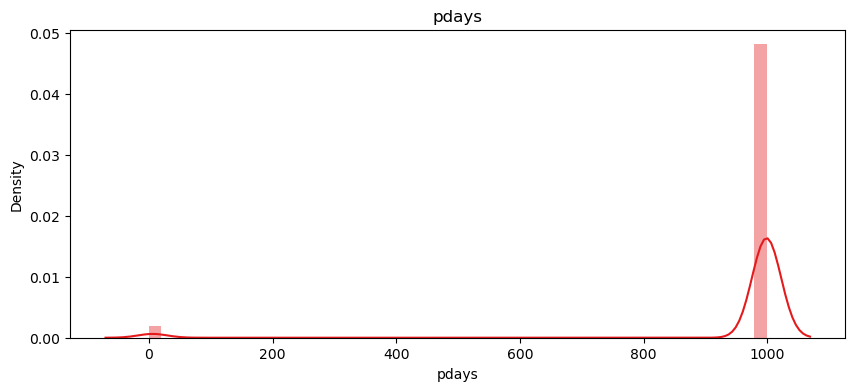

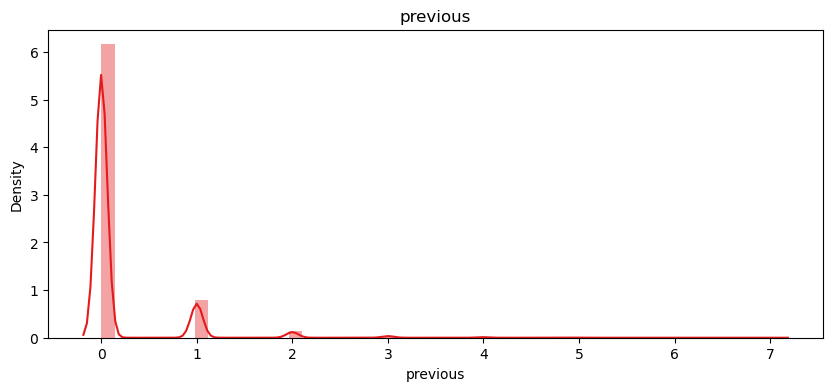

In [30]:
# plotting histogram for each variable
for column in ["pdays","previous"]:
    plt.figure(figsize=(10,4))
    sns.distplot(df[column])
    plt.title(column)

Looking at the plots for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.

Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [31]:
df.drop(columns=["pdays", "previous"], axis=1, inplace=True)

# Part 4: Preprocessing  <a id= '4'></a>

## 4.1 Encoding Categorical Features

Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [32]:
# indentifying the categorical variables
df_categorical_columns = df.select_dtypes(include=['object']).columns

In [33]:
for i in df_categorical_columns:
    print(i, ":", df[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
response : ['no' 'yes']


Features like job education month day_of_week has so many categories, we will Label Encode them as One Hot Encoding would create so many columns

In [34]:
# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in df_categorical_columns:
    df[feature]= le.fit_transform(df[feature])

In [35]:
#Droping last column age_group column which was created solely for visualization purpose
df = df.drop(columns=['age_group'],)

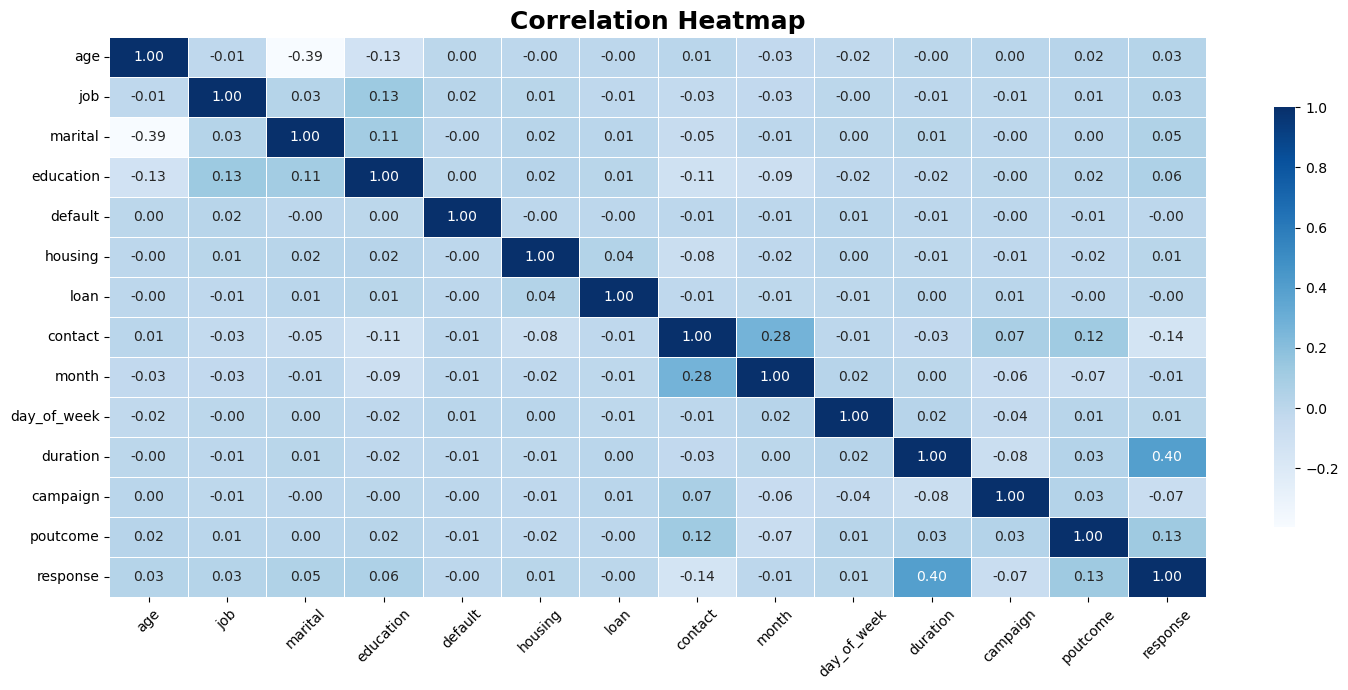

In [36]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 7))

# Plot the correlation heatmap
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Blues', linewidths=.5, cbar_kws={"shrink": 0.75})

# Customize the aesthetics
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()




1. A correlation of 0.4 between Response and duration of calls means that there is a moderate positive relationship between these two variables. which means clients are more likely to accept the term deposit when duration of calls is high

2. A correlation of 0.28 between month and contact means that there is a weak positive relationship between these two variables.This means the campaign was more active or effective in the later months of the year.This could be due to seasonal factors, such as customer demand, holidays, or weather, that influenced the campaign strategy or performance.

Duration feature strongly influences the final result (for example, if duration is 0, then the outcome is 'no'). However, the duration is unknown before making a call. Once the call is completed, the outcome becomes evident. Thus it should be discarded if the intention is to have a realistic predictive model.

In [37]:
df.drop(columns=["duration"], axis=1, inplace=True)

## 4.2 Separating Features and Target variables into X and y

The values of the first 13 columns, which contain customer statistics, are selected as features while the value of the second last column, 'response', is set as target.

In [38]:
# feature variables
X= df.iloc[:, :-1]

# target variable
y= df.iloc[:, -1]

In [39]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome
0,49,1,1,2,0,0,0,0,7,4,4,1
1,37,2,1,6,0,0,0,1,7,4,2,0
2,78,5,1,0,0,0,0,0,3,1,1,1
3,36,0,1,6,0,1,0,1,6,1,2,1
4,59,5,0,6,0,0,0,0,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,1,1
32946,52,9,1,5,0,1,0,0,7,0,1,0
32947,54,0,1,2,0,0,1,0,3,1,4,1
32948,29,0,1,6,0,0,0,1,6,0,1,1


In [40]:
y

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: response, Length: 32919, dtype: int32

## 4.3 Train/ test split

In [41]:
# 20% of the data will be used for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

## 4.4 Handling imbalanced dataset

In [42]:
df['response'].value_counts()

response
0    29207
1     3712
Name: count, dtype: int64

In [43]:
# percentage of class present in target variable(response)
print("percentage of NO and YES\n",df["response"].value_counts()/len(df)*100)

percentage of NO and YES
 response
0    88.723837
1    11.276163
Name: count, dtype: float64


* Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

The SMOTE algorithm is a popular oversampling technique for imbalanced datasets because it can balance the class distribution while avoiding overfitting

In [44]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X_train, y_train)
# target class count of resampled dataset
y_os.value_counts()

response
1    23365
0    23365
Name: count, dtype: int64

# Part 5 Machine Learning: Classification  <a id= '5'></a>

The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.

In [45]:
# List of classifiers
classifiers = [
    LogisticRegression(random_state=123),
    DecisionTreeClassifier(random_state=123),
    RandomForestClassifier(random_state=123),
    XGBClassifier(random_state=123),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(random_state=123)
]

# Dictionary to store results without oversampling
results_without_oversampling = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Precision': [], 'Recall': []}

# Dictionary to store results with oversampling
results_with_oversampling = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Precision': [], 'Recall': []}

# Variables to store best model information
best_model_name_without = None
best_model_without = None
best_accuracy_without = 0.0

best_model_name_with = None
best_model_with = None
best_accuracy_with = 0.0

# Train and evaluate each classifier without oversampling
for clf in classifiers:
    clf.fit(X_train, y_train)  # Use original data without oversampling
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the dictionary (without oversampling)
    results_without_oversampling['Model'].append(clf.__class__.__name__)
    results_without_oversampling['Accuracy'].append(acc)
    results_without_oversampling['F1 Score'].append(f1)
    results_without_oversampling['Precision'].append(prec)
    results_without_oversampling['Recall'].append(rec)

    # Check if current model has the highest accuracy
    if acc > best_accuracy_without:
        best_accuracy_without = acc
        best_model_name_without = clf.__class__.__name__
        best_model_without = clf


for clf in classifiers:
    clf.fit(X_os, y_os)  # Using oversampled data
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the dictionary (with oversampling)
    results_with_oversampling['Model'].append(clf.__class__.__name__)
    results_with_oversampling['Accuracy'].append(acc)
    results_with_oversampling['F1 Score'].append(f1)
    results_with_oversampling['Precision'].append(prec)
    results_with_oversampling['Recall'].append(rec)

    # Check if current model has the highest accuracy
    if acc > best_accuracy_with:
        best_accuracy_with = acc
        best_model_name_with = clf.__class__.__name__
        best_model_with = clf

# Create DataFrames from the results
df_results_without_oversampling = pd.DataFrame(results_without_oversampling)
df_results_with_oversampling = pd.DataFrame(results_with_oversampling)

# Highlight the best models based on Accuracy
df_results_without_oversampling_styled = df_results_without_oversampling.style.highlight_max(color='Grey', subset=['Accuracy','F1 Score','Precision','Recall'])
df_results_with_oversampling_styled = df_results_with_oversampling.style.highlight_max(color='Grey', subset=['Accuracy','F1 Score','Precision','Recall'])

# Print the tables
print("Results Without Oversampling:")
display(df_results_without_oversampling_styled)

print("\nBest Model Without Oversampling:")
print(f"{best_model_name_without} with Accuracy: {best_accuracy_without:.4f}")

print("\nResults With Oversampling:")
display(df_results_with_oversampling_styled)

print("\nBest Model With Oversampling:")
print(f"{best_model_name_with} with Accuracy: {best_accuracy_with:.4f}")

Results Without Oversampling:


,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.888518,0.023936,0.900000,0.012129
1,DecisionTreeClassifier,0.829587,0.279846,0.267157,0.293801
2,RandomForestClassifier,0.886847,0.295175,0.495238,0.210243
3,XGBClassifier,0.890796,0.297165,0.540925,0.204852
4,GaussianNB,0.417224,0.249560,0.145962,0.859838
5,KNeighborsClassifier,0.882290,0.160347,0.408840,0.099730
6,SVC,0.887303,0.000000,0.000000,0.000000



Best Model Without Oversampling:
XGBClassifier with Accuracy: 0.8908

Results With Oversampling:


,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.593712,0.251329,0.158601,0.605121
1,DecisionTreeClassifier,0.777187,0.265398,0.211155,0.357143
2,RandomForestClassifier,0.824119,0.341297,0.295276,0.404313
3,XGBClassifier,0.781440,0.331009,0.252661,0.479784
4,GaussianNB,0.522023,0.255500,0.154950,0.727763
5,KNeighborsClassifier,0.742102,0.285354,0.207466,0.456873
6,SVC,0.568955,0.261707,0.162153,0.677898



Best Model With Oversampling:
RandomForestClassifier with Accuracy: 0.8241


**XGBoost Classifier is the best performing model.**

Among all algorithms, **XGBoost Classifier** achieved an accuracy of about 89%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

In [48]:
# Print the classification report and confusion matrix of the model with the highest accuracy
print(f"\nClassification Report for {best_model_name_without} (Best Model):\n")
print(classification_report(y_test, best_model_without.predict(X_test)))

print(f"\nConfusion Matrix for {best_model_name_without} (Best Model):\n")
print(confusion_matrix(y_test, best_model_without.predict(X_test)))


Classification Report for XGBClassifier (Best Model):

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5842
           1       0.25      0.48      0.33       742

    accuracy                           0.78      6584
   macro avg       0.59      0.65      0.60      6584
weighted avg       0.85      0.78      0.81      6584


Confusion Matrix for XGBClassifier (Best Model):

[[4789 1053]
 [ 386  356]]


Classification report shows the precision, recall, F1 and support scores for the Random Forest classification model.
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 93%.
* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 82% correctly that they would decline the offer.

In general, the report shows that **XGBoost model has great predictive power to identify the customers who would not subscribe to the term deposit**.

# Part 6 Conclusion and Recommendations:  <a id= '7'></a>


**The main objective of this project is to increase the effectiveness of the bank's telemarketing campaign, which was successfully met through data analysis, visualization and analytical model building. A target customer profile was established while classification and regression models were built to predict customers' response to the term deposit campaign.**

1. Age:

* Target both younger and older age groups for term deposits, as they show higher positive response rates compared to the middle-aged group.
* Adjust marketing strategies to emphasize the benefits of term deposits for retirement planning among older customers and as a flexible option for younger individuals.
2. Job:

* Focus marketing efforts on retired and student categories, as they exhibit the highest positive response rates.
* Reevaluate the marketing approach for admin job category, as it has a high contact rate but low positive response rate.
3. Marital Status:

* Direct marketing efforts towards single individuals, as they have a higher positive response rate compared to the married category.
* Consider tailoring messages to address the specific needs or concerns of married individuals to improve response rates in this group.
4. Education:

* Continue targeting customers with a university degree, as they have the highest positive response rate.
* Develop marketing materials that highlight the benefits of term deposits for individuals with higher education levels.
5. Credit in Default:

* Implement targeted strategies to engage and convert non-defaulters into term deposit subscribers.
* Explore ways to address concerns or barriers that defaulters may have regarding term deposits.
6. Loan:

* Create targeted campaigns for individuals without personal or housing loans, emphasizing the compatibility of term deposits with their financial goals.
* Develop marketing materials that address concerns about additional financial commitments for individuals with existing loans.
7. Mode of Contact:

* Prioritize cellular contact methods, as they have shown higher conversion rates than telephonic contact.
Allocate resources and efforts accordingly to the more effective mode of contact.
8. Month:

* Adjust the timing of telemarketing campaigns to align with periods of higher subscription rates (fall and spring).
* onduct further analysis to ensure the consistency of seasonal effects over time and consider adapting strategies based on evolving customer behavior.
9. Duration of Calls:

* Train marketing agents to engage in more detailed discussions with potential customers, as longer conversations tend to result in positive responses.
* Monitor outliers to identify any unique circumstances or characteristics that may influence conversation length and adjust strategies accordingly.
10. No of Calls During Campaign:

* Limit the number of calls to each client, avoiding excessive contact which may lead to dissatisfaction.
* Implement a more personalized approach for clients contacted numerous times to address their potential special needs.


**Implementing these recommendations will likely result in a more effective telemarketing campaign, ultimately increasing the subscription rate for long-term deposits and achieving the main goal of improving the bank's phone marketing.**




